In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np 

In [2]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [3]:
trainy[0]

5

In [4]:
strainX = trainX[:5000]
strainX[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
strainy = trainy[:5000]
strainy[0]

5

In [6]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


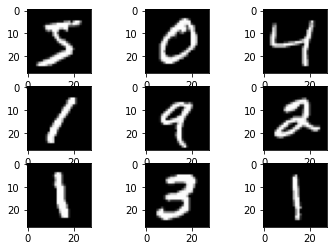

In [7]:
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [8]:
# Function to find Euclidian distance
import numpy as np
from scipy.spatial import distance

def euclidean_distance(img_a, img_b):
    #mistake: sum((img_a-img_b)**2). We have to use np.array. np.sum converts it to array first then adds.
    return np.sum((img_a-img_b)**2)

In [9]:
# Locate the most similar neighbors
from collections import defaultdict

def find_majority(labels) :
	#Here I have used defaultdict because normal dict will give error if key is not define. Refer:https://www.geeksforgeeks.org/defaultdict-in-python/
	counter = defaultdict(int)
	for label in labels:
		counter[label] = counter[label] + 1
	#print(counter)
	#While iterating through dictionary, if you want to use both key and values, .items() method is used.
	majority_count = max(counter.values())
	#print (majority_count)
	for key,value in counter.items() :
		if value == majority_count : 
			r = key
			return r


In [10]:
def Sort_tuple(tup):
    tup.sort(key = lambda x : x[0])
    return tup

In [11]:
# Make a classification prediction with neighbors
def predict(k,train_images, train_labels, test_images):
	distances = []
	for (x,y) in zip(train_images, train_labels): 
		distances.append((euclidean_distance(image, x),y))
	#Here we need to retain the labels but have to sort according to the distance, which is the first element in the tuple. Therefore we need to use lambda function. 
	
	sdistances = Sort_tuple(distances)
	
	
	
	k_labels = []
	for (_,label) in sdistances[:k]:
		k_labels.append(label)
		

	return find_majority(k_labels)
	

In [12]:
i = 0
correct = 0
for image in trainX : 
    l = predict(5,trainX,trainy,testX)
    if l==testy[i] :
        correct = correct + 1
    accuracy = (correct/ (i+1)) * 100
    
    i+=1

IndexError: index 10000 is out of bounds for axis 0 with size 10000

In [13]:
print(accuracy)

10.780000000000001
